#  MACHINE LEARNING 

# Tensori
Un tensore è una struttura dati multidimensionale utilizzata principalmente nelle librerie di calcolo numerico e di apprendimento automatico come PyTorch e TensorFlow. Può essere pensato come una generalizzazione dei vettori e delle matrici a più dimensioni.
Sono simili agli ndarray di NumPy, tranne per il fatto che i tensori possono essere eseguiti su GPU o altro hardware specializzato per accelerare l'elaborazione.
Per utilizzare i tensori, bisogna importare la libreria come segue:

In [11]:
import torch
import numpy as np

I tensori possono essere inizializzati come segue con le informazioni seguenti:

In [12]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(f"Shape of tensor: {x_data.shape}")
print(f"Datatype of tensor: {x_data.dtype}")
print(f"Device tensor is stored on: {x_data.device}")

Shape of tensor: torch.Size([2, 2])
Datatype of tensor: torch.int64
Device tensor is stored on: cpu


È possibile, inoltre, convertire alcune strutture dati in tensore. Di seguito un esempio:

In [13]:
x = torch.tensor([1,2,3,4])

print("Is tensor: ", torch.is_tensor(x))        
print("Size of x:", x.size())                   
print("Element at ([1,2]): ", x[2].item())     

# Conversione
other_data_structure = [1,2,3,4]
converted = torch.as_tensor(other_data_structure)
print("TENSOR FROM OTHER DATA STRUCTURE:",converted)

Is tensor:  True
Size of x: torch.Size([4])
Element at ([1,2]):  3
TENSOR FROM OTHER DATA STRUCTURE: tensor([1, 2, 3, 4])


È possibile eseguire un gran numero di operazioni sui tensori.
Ognuno di esse può essere eseguite sulla GPU (a velocità generalmente più elevate rispetto a una CPU).

In [14]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = x_data.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

# DATASET e DATALOADER
Il codice per elaborare campioni di dati può diventare disordinato e difficile da mantenere; idealmente vogliamo che il nostro codice del dataset sia diviso dal codice per l'addestramento del modello per una migliore leggibilità e modularità. PyTorch fornisce due primitive di dati: torch.utils.data.DataLoader e torch.utils.data.Dataset che ti consentono di utilizzare set di dati pre-caricati oltre ai tuoi dati personalizzati. 

<font color="green">Dataset:</font>
* l Dataset è una classe di PyTorch che memorizza i campioni di dati e le loro etichette corrispondenti.
* Si tratta essenzialmente di una rappresentazione dei dati grezzi senza alcuna elaborazione.
* Può essere personalizzato per adattarsi alle specifiche esigenze del tuo set di dati, implementando i metodi __getitem__() e __len__().
* Un esempio comune è la sottoclasse torch.utils.data.Dataset che definisce un set di dati come FashionMNIST o CIFAR-10.

<font color="green">Dataloader:</font>
* Il DataLoader è una classe di PyTorch che avvolge un Dataset e lo rende iterabile.
* Fornisce funzionalità aggiuntive come il batching dei dati, il campionamento casuale e il caricamento parallelo dei dati.
* Semplifica l'accesso ai campioni di dati durante l'addestramento del modello.
* Può essere configurato con parametri come batch_size, shuffle, num_workers, ecc., per personalizzare il comportamento del caricamento dei dati.
* In sostanza, il DataLoader "confeziona" i dati del Dataset in mini-batch gestibili per l'addestramento del modello.


Ecco un esempio di come caricare il set di dati Fashion-MNIST da TorchVision. ***Fashion-MNIST*** è un dataset di dati di immagini degli articoli di Zalando composto da 60.000 esempi di train e 10.000 esempi di test.
Ogni esempio comprende un'immagine in scala di grigi 28×28 e un'etichetta associata da una delle 10 classi.

In [15]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)
print(f"Training Data info: {training_data}")
print(f"Test Data info: {test_data}")


Training Data info: Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Test Data info: Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


Nello specifico:

* ***Root:*** È il percorso principale dove sono memorizzati i dati.

* ***Train/Test:*** Indica se il set di dati specificato è per l'addestramento o per il test del modello.

* ***Download:*** Impostando questo parametro su True, i dati verranno scaricati automaticamente da Internet se non sono presenti nella radice specificata.

* ***Transform e target_transform:*** Specificano le trasformazioni da applicare alle caratteristiche (input) e alle etichette (output) dei dati. Questo è utile per eseguire operazioni come la normalizzazione dei dati o la conversione delle etichette in un formato desiderato prima di passarli al modello.


Possiamo indicizzare manualmente i set di dati come una lista: ***training_data[index]***. Utilizziamo matplotlib per visualizzare alcuni campioni nei nostri dati di addestramento.

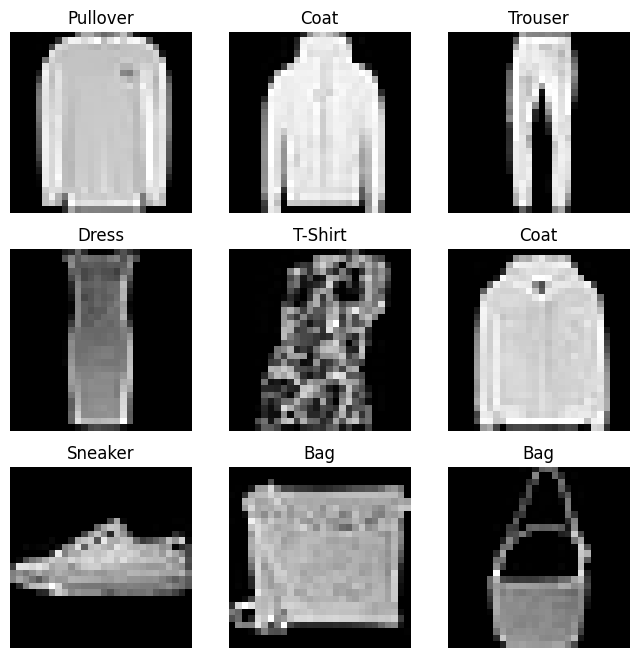

In [16]:
# Mappiamo gli indici delle classi alle relative etichette testuali.
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# Creiamo una nuova figura di dimensioni 8x8 pollici.
figure = plt.figure(figsize=(8, 8))
# Definiamo il numero di colonne e righe per il layout dei subplot.
cols, rows = 3, 3
# Iteriamo attraverso i subplot della figura.
for i in range(1, cols * rows + 1):
    # Generiamo un indice casuale per estrarre un campione dal set di dati di addestramento.
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    # Estraiamo l'immagine e l'etichetta corrispondente dal set di dati di addestramento.
    img, label = training_data[sample_idx]
    # Aggiungiamo un nuovo subplot alla figura.
    figure.add_subplot(rows, cols, i)
    # Impostiamo il titolo del subplot con l'etichetta corrispondente.
    plt.title(labels_map[label])
    # Disabilitiamo gli assi per una migliore visualizzazione.
    plt.axis("off")
    # Visualizziamo l'immagine come scala di grigi.
    plt.imshow(img.squeeze(), cmap="gray")

# Mostriamo la figura completa con i subplot.
plt.show()


# Reference
https://pytorch.org/tutorials/beginner/basics

# Author
Vetrano Alessio, 2024